# ISB02303402 Data Science
## Week 8 Classification Concept (Multi)

### Classification

Data Scientists are frequently assigned with automating business decisions.
* Will the user act on the advertisement with the new website design?
* Does email constitute fraud?
* Will a particular price sell?

All of these problems involve classification, a form of supervised learning in which one must first train a model on data whose outcome is known and then apply the model to data whose outcome is undetermined.

In classification analysis, a number of variables/features serve as predictors of targets with [categorical] data types.(https://www.forml.us/blog/categorical-data)

Common steps in Classification are explained as follows:
1. Import libraries
2. Load dataset
3. Prepare data: Missing Values, Scaling, and Encoding
4. Assign predictors and target variables
5. Splitting the dataset into the Training dataset and Test dataset
6. Create Model from training dataset
7. Predict target based on testing dataset
8. Evaluate model: accuracy, precision, recall, f1-score

## K-Nearest Neighnour (K-NN) Classifier
The t-shirt size dataset contains two features and a target variable

### 1. Import Libraries

In [152]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset
The dataset used contains information on a person's height and weight which is used to classify his/her t-shirt size.

In [14]:
# Load dataset
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/tshirt_size.csv"
dataset = pd.read_csv(url)
dataset.sample(n = 5)

,Height,Weight,T-Shirt Size
11,162,61,M
39,168,62,L
22,161,59,M
12,162,59,M
24,163,54,M


### 3. Prepare data: Missing Values, Scaling, and Transform
Feature Scaling and Data Transform may be done after assigning the feature and target variables.<br>
Visualizing data may help to understand the relationship between feature and target variables.

In [15]:
# Display the dataset structure
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Height        48 non-null     int64 
 1   Weight        48 non-null     int64 
 2   T-Shirt Size  48 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [16]:
# Check for Missing Values
dataset.isna().sum()

Height          0
Weight          0
T-Shirt Size    0
dtype: int64

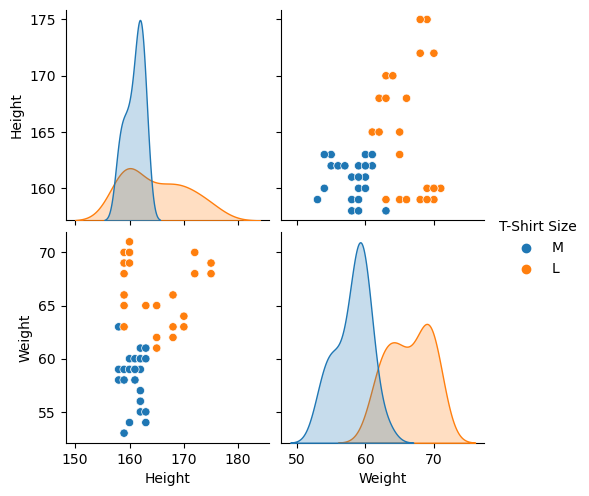

In [17]:
# Create a pair plot of height and weight, classified by T-Shirt Size
sns.pairplot(dataset, hue="T-Shirt Size")
plt.show()

### 4. Assign predictor (independent) variables and target (dependent) variable

In [18]:
# Assign predictors and target variable
X = dataset[['Height', 'Weight']].values
y = dataset['T-Shirt Size'].values

In [19]:
# Feature Scaling: Normalize or standardize the numerical features to ensure that they have a similar scale, 
# which is important for distance-based algorithms like k-NN.
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [32]:
# Encoding: Convert categorical variables into a numerical format
# The LabelEncoder and OneHotEncoder are both widely used for encoding categorical variables in machine learning. 
# However, they have different applications and implications.
# LabelEncoder can handle ordinal data, while OneHotEncoder is more suitable for nominal data.

# T-Shirt Size is Ordinal Data, let's use LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

### 5. Splitting the dataset into the Training dataset and Test dataset

In [21]:
from sklearn.model_selection import train_test_split

# Perform train test split using test size of 25% and random state of 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 6. Create Model from training dataset

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Make the classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train) # X_train doesn't need array.reshape(-1, 1)

KNeighborsClassifier(metric='euclidean')

### 7. Predict target based on testing dataset

In [23]:
# Predict y_pred from classification model using X_test
y_pred = classifier.predict(X_test)

# Make a dataframe to compare y_test and y_pred side-by-side
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,1


### 8. Evaluate model: accuracy, precision, recall, f1-score

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Display the accuracy score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_true=y_test, y_pred=y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[7 1]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



## Exercise: K-NN Classifier
In an e-Marketplace application, the user's age and estimated salary are observed, and based on these two variables, it is predicted whether the user will purchase the offered product.<p>
The dataset is accessible via the following link: https://raw.githubusercontent.com/twiradinata/datasets/main/social_network_ads.csv <p>
Utilize the K-NN Classifier to predict it and calculate the model's accuracy. For this dataset, which of Logistic Regression and K-NN Classifier shows best performance?

### Load Dataset

In [27]:
# Load Dataset
url = " https://raw.githubusercontent.com/twiradinata/datasets/main/social_network_ads.csv"
data = pd.read_csv(url)
data.sample(n = 5)

,Age,EstimatedSalary,Purchased
34,27,90000,0
223,60,102000,1
176,35,47000,0
173,34,43000,0
136,20,82000,0


In [28]:
# Exploratory Data Analysis
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


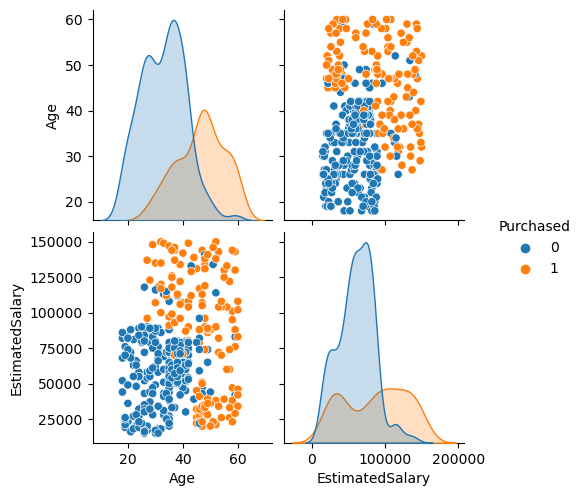

In [30]:
# Display the pair plot to check whether the clusters can be classified
sns.pairplot(data, hue="Purchased")
plt.show()

In [36]:
# Assign the predictor and target variables
x = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

In [40]:
from sklearn.model_selection import train_test_split

# Perform train test split using test size of 25% and random state of 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Make a K-NN classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_train, y_train)

# Predict X_test
y_pred = classifier.predict(x_test)

In [42]:
# Display the dataframe to compare y_test and y_pred side-by-side
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the accuracy score
cr = classification_report(y_true=y_test, y_pred=y_pred)
print("Accuracy Score:\n", cr)

Confusion Matrix:
 [[49  9]
 [16 26]]
Accuracy Score:
               precision    recall  f1-score   support

           0       0.75      0.84      0.80        58
           1       0.74      0.62      0.68        42

    accuracy                           0.75       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.75      0.75      0.75       100



## Exercise 2
### Titanic Dataset

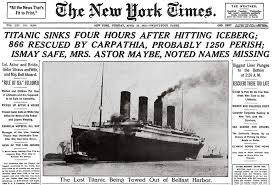

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [156]:
# Read dataset from seaborn library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

dataset.sample(n = 5)
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [157]:
# Use only 'age', 'sex', 'pclass', 'survived'
df = titanic[['age','sex','pclass','survived']]
df.head()

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       714 non-null    float64
 1   sex       891 non-null    object 
 2   pclass    891 non-null    int64  
 3   survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [159]:
# Drop the column with null values
titanic_cleaned = df.dropna(axis=0)
# Display the first few rows of the cleaned DataFrame
titanic_cleaned.head()

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [160]:
# transform sex column from str to int
titanic_cleaned['sex'] = titanic_cleaned['sex'].map({'female': 0, 'male': 1})
titanic_cleaned.head()

C:\Users\Marvel Hans S\AppData\Local\Temp\ipykernel_28064\1655675957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cleaned['sex'] = titanic_cleaned['sex'].map({'female': 0, 'male': 1})


,age,sex,pclass,survived
0,22.0,1,3,0
1,38.0,0,1,1
2,26.0,0,3,1
3,35.0,0,1,1
4,35.0,1,3,0


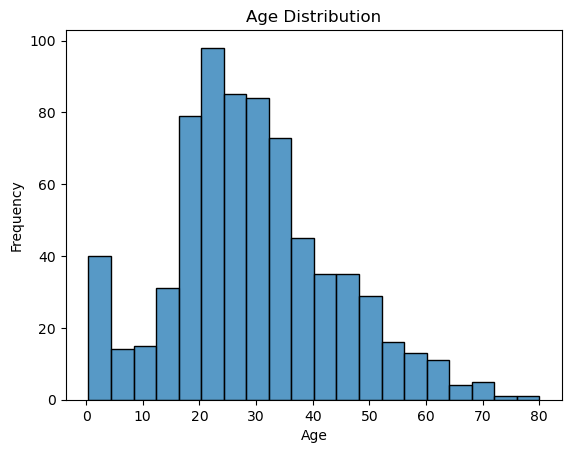

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Draw the histogram
sns.histplot(data=titanic, x='age')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

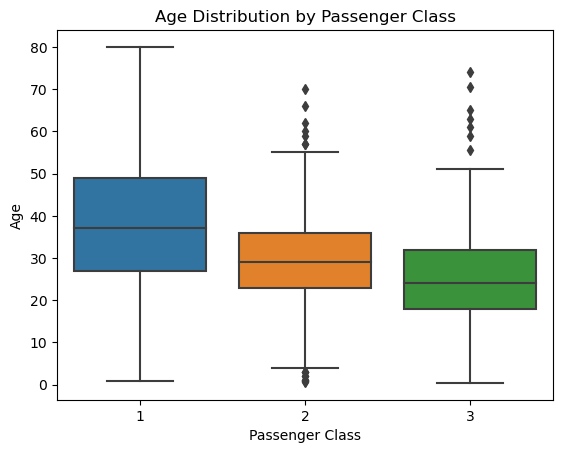

In [162]:
# Display boxplot of 'age' grouped by pclass
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Draw the boxplot
sns.boxplot(data=titanic, x='pclass', y='age')

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')

# Show the plot
plt.show()

In [163]:
# Assign predictors and target variable
X = titanic_cleaned[['age', 'pclass', 'sex']].values
y = titanic_cleaned['survived'].values

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [164]:
from sklearn.model_selection import train_test_split

# Perform train test split using test size of 20% and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

# Make the classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [167]:
# Predict y_pred from the logistic regression model using X_test
y_pred_log = model.predict(X_test)
# Predict y_pred from the k-nearest neighbors model using X_test
y_pred_knn = classifier.predict(X_test)

# Make a DataFrame to compare y_test, y_pred_log, and y_pred_knn side-by-side
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred_log": y_pred_log, "y_pred_knn": y_pred_knn})
comparison_table.head()

,y_test,y_pred_log,y_pred_knn
0,0,0,0
1,1,0,1
2,1,1,1
3,1,1,1
4,0,0,0


In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assuming 'model' is a trained logistic regression model
model = LogisticRegression()

# Train the model (not shown in the provided code)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display confusion matrix and accuracy for logistic regression
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix using Logistic Regression:')
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Display accuracy
print(f"Accuracy: {accuracy}")

Confusion Matrix using Logistic Regression:
[[69 18]
 [18 38]]
Accuracy: 0.7482517482517482
